In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [4]:
data = pd.read_csv('kag_risk_factors_cervical_cancer.csv')

In [5]:
display(data.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [6]:
display(data.head().T)

,0,1,2,3,4
Age,18,15,34,52,46
Number of sexual partners,4.0,1.0,1.0,5.0,3.0
First sexual intercourse,15.0,14.0,?,16.0,21.0
Num of pregnancies,1.0,1.0,1.0,4.0,4.0
Smokes,0.0,0.0,0.0,1.0,0.0
Smokes (years),0.0,0.0,0.0,37.0,0.0
Smokes (packs/year),0.0,0.0,0.0,37.0,0.0
Hormonal Contraceptives,0.0,0.0,0.0,1.0,1.0
Hormonal Contraceptives (years),0.0,0.0,0.0,3.0,15.0
IUD,0.0,0.0,0.0,0.0,0.0


In [7]:
data['Hormonal Contraceptives'].value_counts()

1.0    481
0.0    269
?      108
Name: Hormonal Contraceptives, dtype: int64

In [8]:
data_short = data.loc[:,['Age','First sexual intercourse','Number of sexual partners','Hormonal Contraceptives','Smokes', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Smokes (years)','Num of pregnancies','STDs']]

In [9]:
data_short.head()

,Age,First sexual intercourse,Number of sexual partners,Hormonal Contraceptives,Smokes,STDs: Number of diagnosis,Dx:Cancer,Smokes (years),Num of pregnancies,STDs
0,18,15.0,4.0,0.0,0.0,0,0,0.0,1.0,0.0
1,15,14.0,1.0,0.0,0.0,0,0,0.0,1.0,0.0
2,34,?,1.0,0.0,0.0,0,0,0.0,1.0,0.0
3,52,16.0,5.0,1.0,1.0,0,1,37.0,4.0,0.0
4,46,21.0,3.0,1.0,0.0,0,0,0.0,4.0,0.0


In [12]:
(data_short == '?').sum()

Age                          0
First sexual intercourse     0
Number of sexual partners    0
Hormonal Contraceptives      0
Smokes                       0
STDs: Number of diagnosis    0
Dx:Cancer                    0
Smokes (years)               0
Num of pregnancies           0
STDs                         0
dtype: int64

In [11]:
data_short = data_short.where(data_short != '?', other=0)

In [13]:
data_short= data_short.astype(float)

In [14]:
#sns.pairplot(data_short, x_vars=['Age','Number of sexual partners','Hormonal Contraceptives','Smokes', 'STDs: Number of diagnosis', 'Dx:Cancer'],
#            y_vars=['Age','Number of sexual partners','Hormonal Contraceptives','Smokes', 'STDs: Number of diagnosis', 'Dx:Cancer'], hue='Dx:Cancer')

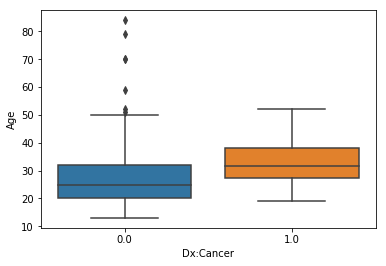

In [15]:
sns.boxplot(data=data_short, x='Dx:Cancer', y='Age')

In [16]:
#Lets make a new dataframe to store our features
feature = pd.get_dummies(data_short['Dx:Cancer'])

In [17]:
feature.head()

,0.0,1.0
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [18]:
display(pd.crosstab(data_short['Dx:Cancer'], data_short['Smokes']))
print('Percentage of non-smokers with cancer is {:.3f}'.format(16/719))
print('Percentage of smokers with cancer is {:.3f}'.format(2/121))

Smokes,0.0,1.0
Dx:Cancer,,
0.0,719,121
1.0,16,2


Percentage of non-smokers with cancer is 0.022
Percentage of smokers with cancer is 0.017


In [19]:
#Let's see if sexual partners by age shows any cancer indication
data_short['sexp_age_ratio'] = data_short['Number of sexual partners']/data_short['Age']
feature['sexp_age_ratio'] = data_short['sexp_age_ratio']

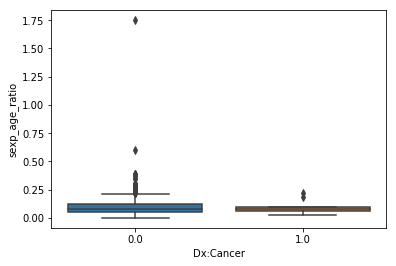

In [20]:
#It does not appear that there is a correlation but there are a lot of outliers
sns.boxplot(data=data_short, x='Dx:Cancer', y='sexp_age_ratio')

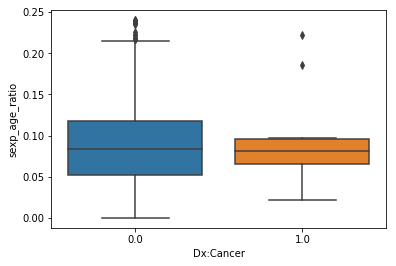

In [21]:
#Let's check the data without some of those outliers
sns.boxplot(data=data_short.query('sexp_age_ratio < 0.25'), x='Dx:Cancer', y='sexp_age_ratio')

In [22]:
data_short['age_sq'] = data_short['Age']**2
feature['age_sq'] = data_short['age_sq']

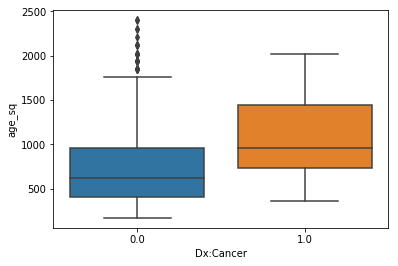

In [23]:
#We can see that squaring the age more significantly shows a difference in the two groups
sns.boxplot(data=data_short.query('age_sq < 2500'), x='Dx:Cancer', y='age_sq')

In [24]:
data_short['diag_bool'] = (data_short['STDs: Number of diagnosis'] > 0).astype(float)
feature['diag_bool'] = data_short['diag_bool']

In [25]:
#You are less likely to get cervical cancer if you do not have an STD
display(pd.crosstab(data_short['Dx:Cancer'],data_short['diag_bool']))
print('Percentage of people who have no STDs with cancer is {:.3f}'.format(17/770))
print('Percentage of people who have one or more STDs with cancer is {:.3f}'.format(1/70))

diag_bool,0.0,1.0
Dx:Cancer,,
0.0,770,70
1.0,17,1


Percentage of people who have no STDs with cancer is 0.022
Percentage of people who have one or more STDs with cancer is 0.014


In [26]:
1/70

0.014285714285714285

In [27]:
#Let's see if cubing the age data can give us a better fit or shows a more substantial change
data_short['age_cub'] = data_short['Age'] ** 3
feature['age_cub'] = data_short['age_cub']

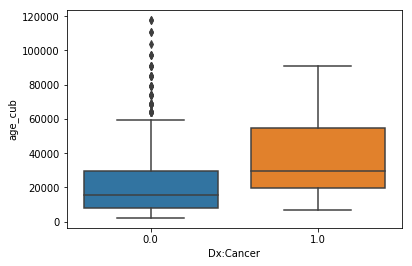

In [28]:
sns.boxplot(data=data_short.query('age_cub < 120000'), x='Dx:Cancer', y='age_cub')

In [29]:
data_short['smoke_age_ratio'] = data_short['Smokes (years)']/data_short['Age']
feature['smoke_age_ratio'] = data_short['smoke_age_ratio']

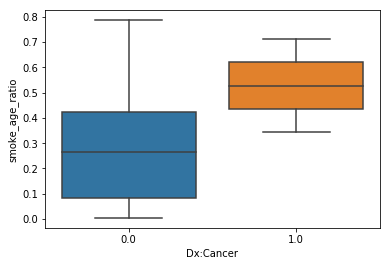

In [28]:
#Data shows that you are more likely to have cancer if you do not smoke
#Let's look at the data within the smokers category
sns.boxplot(data=data_short.query('smoke_age_ratio > 0'), x='Dx:Cancer', y='smoke_age_ratio')

In [29]:
#You have a higher likelihood of getting cancer if you do not smoke
display(pd.crosstab(data_short['Dx:Cancer'], data_short['smoke_age_ratio'] > 0))

print('Percentage of non-smokers with cancer is {:.3f}'.format(16/719))
print('Percentage of smokers with cancer is {:.3f}'.format(2/121))

smoke_age_ratio,False,True
Dx:Cancer,,
0.0,719,121
1.0,16,2


Percentage of non-smokers with cancer is 0.022
Percentage of smokers with cancer is 0.017


In [30]:
data_short['preg_age_ratio'] = data_short['Num of pregnancies']/data_short['Age']
feature['preg_age_ratio'] = data_short['preg_age_ratio']

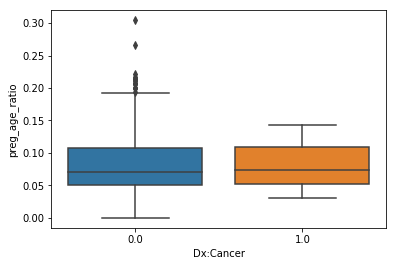

In [31]:
#Looks like the number of pregenacies by age does not show any significant difference.
sns.boxplot(data=data_short, x='Dx:Cancer', y='preg_age_ratio')

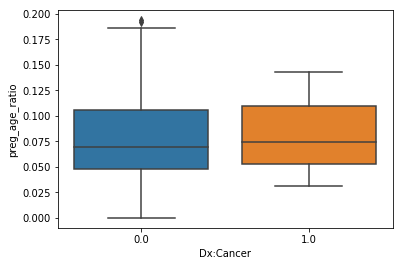

In [32]:
#Let's take a closer look by removing some of those outliers
#Barely any noticeable difference
sns.boxplot(data=data_short.query('preg_age_ratio < 0.20'), x='Dx:Cancer', y='preg_age_ratio')

In [33]:
data_short['part_first_ratio'] = (data_short['Number of sexual partners']/
                                  data_short['First sexual intercourse'])
feature['part_first_ratio'] = data_short['part_first_ratio']

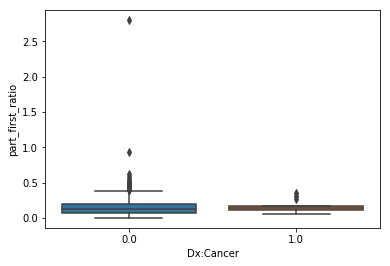

In [34]:
#Can't really see what is going on here, but no obvious difference
sns.boxplot(data=data_short, x='Dx:Cancer', y='part_first_ratio')

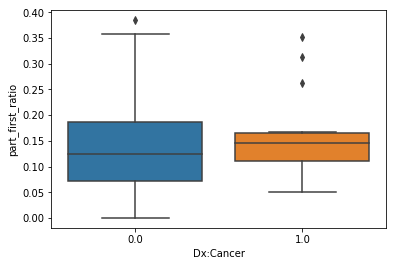

In [35]:
#Let's remove a couple outliers
sns.boxplot(data=data_short.query('part_first_ratio < 0.4'), 
            x='Dx:Cancer', y='part_first_ratio')
#There is a small difference, but not significant with those error bars

In [36]:
#Let's square the smoking data to see if there is more of a correlation
data_short['smoke_sq'] = data_short['Smokes (years)'] ** 2
feature['smoke_sq'] = data_short['smoke_sq']

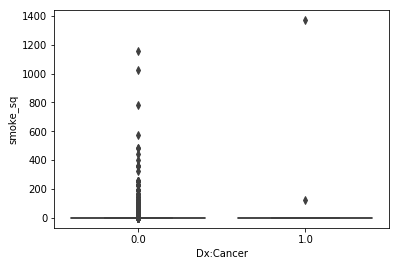

In [37]:
sns.boxplot(data=data_short, x='Dx:Cancer', y='smoke_sq')

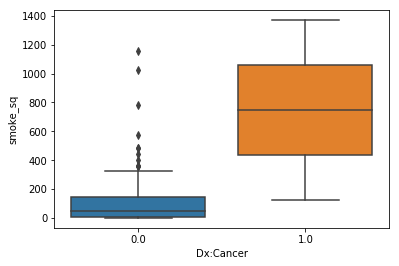

In [42]:
#As before the data is skewed to the large amount of people who do not smoke
#Let's look at just the smokers
sns.boxplot(data=data_short.query('smoke_sq > 0'), x='Dx:Cancer', y='smoke_sq')
#Huge correlation with increased time smoking and likelihood of cancer

In [50]:
feature['smoke_sq_sonly'] = data_short.loc[data_short['smoke_sq'] > 0, 'smoke_sq']

In [51]:
#And take a look at the numerical break down
display(pd.crosstab(data_short['Dx:Cancer'], data_short['smoke_sq'] > 0))
#We have the same break down of smokers as before
print('Percentage of non-smokers with cancer is {:.3f}'.format(16/719))
print('Percentage of smokers with cancer is {:.3f}'.format(2/121))

smoke_sq,False,True
Dx:Cancer,,
0.0,719,121
1.0,16,2


Percentage of non-smokers with cancer is 0.022
Percentage of smokers with cancer is 0.017


In [52]:
data_short['STD_age_ratio'] = data_short['STDs: Number of diagnosis']/data_short['Age']
feature['STD_age_ratio'] = data_short['STD_age_ratio']

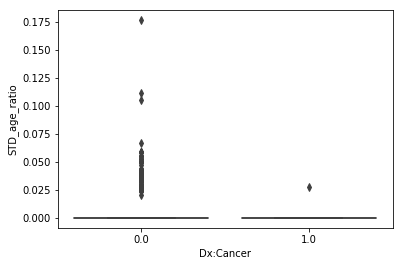

In [53]:
#Not getting a lot of information from this graph, let's look at the data
sns.boxplot(data=data_short, x='Dx:Cancer', y='STD_age_ratio')

In [54]:
display(pd.crosstab(data_short['Dx:Cancer'], data_short['STD_age_ratio'] > 0))
print('Percentage of people without an STD with cancer is {:.3f}'.format(17/770))
print('Percentage of people with an STD with cancer is {:.3f}'.format(1/70))

STD_age_ratio,False,True
Dx:Cancer,,
0.0,770,70
1.0,17,1


Percentage of people without an STD with cancer is 0.022
Percentage of people with an STD with cancer is 0.014


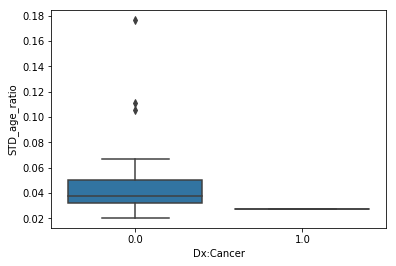

In [55]:
#Let's look at just the spread of people who have STDs
sns.boxplot(data=data_short.query('STD_age_ratio > 0'), x='Dx:Cancer', y='STD_age_ratio')
#Looks like pretty inconclusive with only one data point that has cancer

In [56]:
data_short['STDs_smoke'] = (data_short['STDs'].astype(int).astype(str)+
                            data_short['Smokes'].astype(int).astype(str))
feature['STDs_smoke'] = data_short['STDs_smoke']

In [57]:
display(pd.crosstab(data_short['Dx:Cancer'], data_short['STDs_smoke']))
print('Percentage of people who do not smoke with no STDs with cancer is {:.3f}'
      .format(15/662))
print('Percentage of people who smoke with no STDs with cancer is {:.3f}'
      .format(1/101))
print('Percentage of people who do not smoke with STDs with cancer is {:.3f}'
      .format(1/57))
print('Percentage of people who smoke with STDs with cancer is {:.3f}'
      .format(1/20))

STDs_smoke,00,01,10,11
Dx:Cancer,,,,
0.0,662,101,57,20
1.0,15,1,1,1


Percentage of people who do not smoke with no STDs with cancer is 0.023
Percentage of people who smoke with no STDs with cancer is 0.010
Percentage of people who do not smoke with STDs with cancer is 0.018
Percentage of people who smoke with STDs with cancer is 0.050


In [90]:
X = StandardScaler().fit_transform(feature)
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.28495818 0.24551288 0.18839879 0.13717015 0.08935618]


In [91]:
sklearn_pca.components_

array([[ 0.07167869,  0.22895007,  0.30787012,  0.2242368 ,  0.42258376,
         0.07976751,  0.13483422,  0.45135564,  0.45135564,  0.27454399,
         0.33382555],
       [-0.14575694,  0.28652484, -0.46806526,  0.28458916,  0.15508955,
        -0.02561509, -0.08705181,  0.27551623,  0.27551623, -0.46775994,
        -0.44008826],
       [ 0.59538636, -0.31889226, -0.18041797, -0.30807371,  0.20059977,
         0.01081593,  0.55315801,  0.10046518,  0.10046518, -0.15922038,
        -0.15647392],
       [ 0.32922973,  0.50091227,  0.03165205,  0.51341491, -0.25904404,
         0.09014464,  0.42000877, -0.24914265, -0.24914265,  0.00709953,
         0.01631538],
       [-0.07609279, -0.04931846, -0.04243258, -0.06508482, -0.02295057,
         0.99115058, -0.02558903, -0.00157439, -0.00157439, -0.02652402,
        -0.03836056]])

In [56]:
display(feature.columns)

Index([              0.0,               1.0,  'sexp_age_ratio',
                'age_sq',       'diag_bool',         'age_cub',
       'smoke_age_ratio',   'STD_age_ratio',      'STDs_smoke'],
      dtype='object')

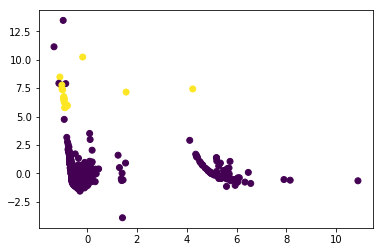

In [52]:
#print(Y_sklearn[:,0])
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=data_short['Dx:Cancer'])

In [80]:
feature = feature.replace([np.inf, -np.inf], 0)
feature = feature.replace(np.nan, 0)

In [89]:
feature = feature.iloc[:,2:]